In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
train = df.iloc[:, 1:2].values
train = (train-train.min())/(train.max()-train.min())

train.shape

(1258, 1)

In [4]:
#shape 1258, 60, 1 #predict next day by past 60 days # available data = 1258-60 = 1198
n = 1258-60
xTrain, yTrain = np.zeros((n, 60, 1)), np.zeros(n)
for i in range(n):
    for j in range(60):
        xTrain[i][j][0] = train[i+j][0]
    yTrain[i] = train[i+60][0]
xTrain.shape, yTrain.shape

((1198, 60, 1), (1198,))

In [5]:
inputs = Input(shape=(60, 1))
x = LSTM(50, return_sequences=True)(inputs)
x = Dropout(0.1)(x)
x = LSTM(50, return_sequences=True)(x)
x = Dropout(0.1)(x)
x = LSTM(50, return_sequences=True)(x)
x = Dropout(0.1)(x)
x = LSTM(50, return_sequences=True)(x)
x = Dropout(0.1)(x)
x = Reshape((3000,))(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizers=Adam(lr=0.0001), loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0     

In [6]:
history = model.fit(xTrain, yTrain, epochs=10, batch_size=64)

Train on 1198 samples
Epoch 1/10
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0604
Epoch 2/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0192
Epoch 3/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0181
Epoch 4/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0160
Epoch 5/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0121
Epoch 6/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0148
Epoch 7/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0102
Epoch 8/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0086
Epoch 9/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0118
Epoch 10/10
1198/1198 [==============================] - 2s 1ms/sample - loss: 0.0100


dict_keys(['loss'])


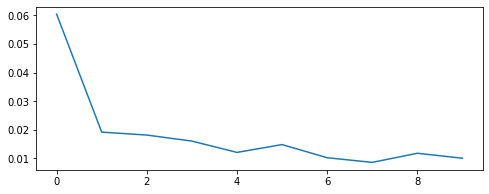

In [7]:
print(history.history.keys())
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])
plt.show()

In [8]:
res = model.predict(xTrain)
res.shape

(1198, 1)

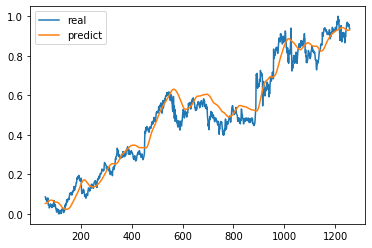

In [9]:
plt.plot(np.arange(60,1258), train[60:])
plt.plot(np.arange(60,1258), res)
plt.legend(labels=["real", "predict"], loc="upper left")
plt.show()